In [67]:
from google.colab import drive
drive.mount('/content/drive')

# Install packages
!pip install faker imbalanced-learn xgboost shap optuna -q

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Clone your repo in Colab
!git clone https://github.com/YOUR_USERNAME/business-analytics-ml.git
%cd business-analytics-ml

# Configure git
!git config --global user.email "asthapankaj2503@gmail.com"
!git config --global user.name "Asthaasu"

Cloning into 'business-analytics-ml'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'business-analytics-ml'
/content/business-analytics-ml/business-analytics-ml


TensorFlow version: 2.19.0
✓ Packages loaded
Loaded 1827 days of revenue data
Date range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00

Revenue statistics:
count    1.827000e+03
mean     5.234316e+05
std      2.889538e+05
min      0.000000e+00
25%      2.785636e+05
50%      5.347504e+05
75%      7.786347e+05
max      1.043308e+06
Name: revenue, dtype: float64


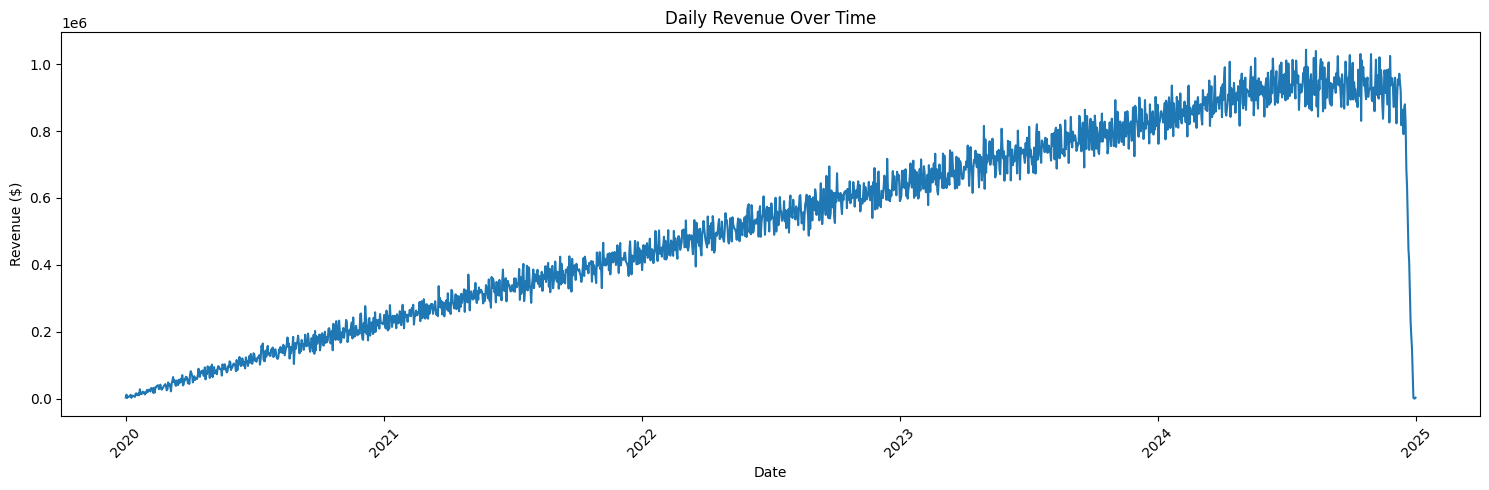


Creating time series features...
After feature engineering: 1797 samples
Total features: 15

Preparing sequences with lookback=30
X shape: (1767, 30, 1)
y shape: (1767, 1)

Train samples: 1413
Test samples: 354

=== BUILDING LSTM MODEL ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

None

=== TRAINING MODEL ===
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0540 - mae: 0.1802 - val_loss: 0.0034 - val_mae: 0.0488 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0047 - mae: 0.0494 - val_loss: 0.0020 - val_mae: 0.0370 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0034 - mae: 0.0407 - val_loss: 0.0014 - val_mae: 0.0290 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0025 - mae: 0.0369 - val_loss: 0.0016 - val_mae: 0.0322 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0025 - mae: 0.0354 - val_loss: 0.0014 - val_mae: 0.0292 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025 - mae: 0.0369 - val_loss: 0.0020 - val_mae: 0.0368 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022 - mae: 0.0343 - val_loss: 0.0016 - val_mae: 0.0318 -

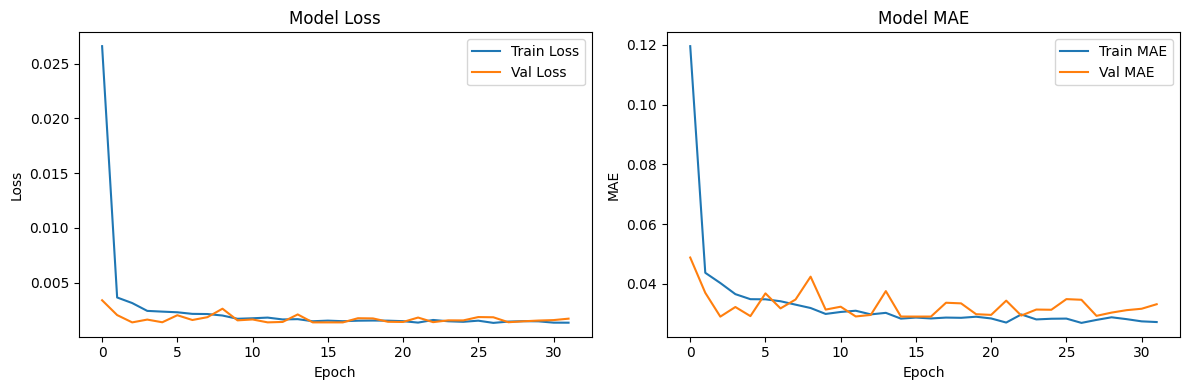


=== MODEL EVALUATION ===
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

Test Set Performance:
MAE:  $52,530.01
RMSE: $100,678.36
MAPE: 126.38%

=== BASELINE COMPARISON ===

7-Day Moving Average Baseline:
MAE:  $39,216.57
RMSE: $55,034.02
MAPE: inf%

✓ LSTM Improvement over baseline:
  MAPE reduction: inf percentage points
  Relative improvement: nan%

Generating prediction visualizations...


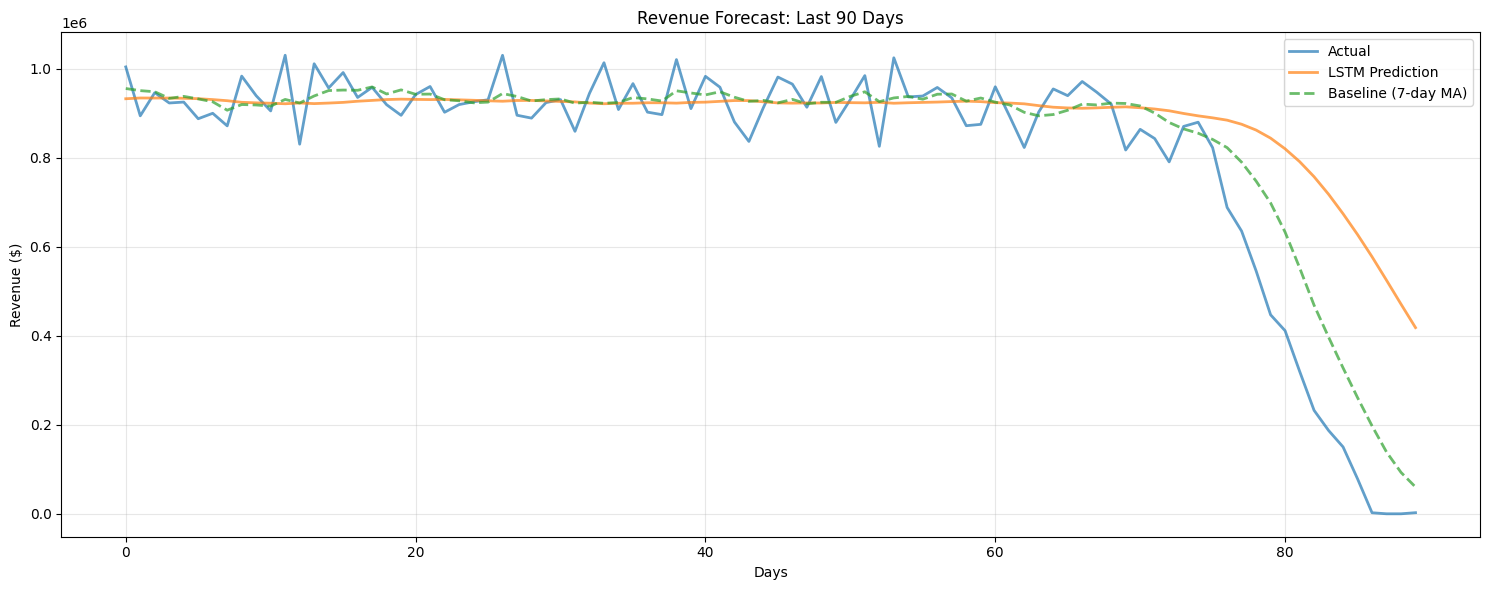


Saving model and artifacts...
✓ Model saved to models/forecasting/

=== FORECASTING MODEL COMPLETE ===
Final MAPE: 126.38%


In [70]:
# ============================================
# CELL 1: Setup
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
import pickle
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")
print("✓ Packages loaded")

# ============================================
# CELL 2: Load Revenue Data
# ============================================
daily_revenue = pd.read_csv('data/raw/daily_revenue.csv', parse_dates=['date'])
daily_revenue = daily_revenue.sort_values('date').reset_index(drop=True)

print(f"Loaded {len(daily_revenue)} days of revenue data")
print(f"Date range: {daily_revenue['date'].min()} to {daily_revenue['date'].max()}")
print(f"\nRevenue statistics:")
print(daily_revenue['revenue'].describe())

# Plot raw data
plt.figure(figsize=(15, 5))
plt.plot(daily_revenue['date'], daily_revenue['revenue'])
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('models/forecasting/revenue_timeseries.png', dpi=150)
plt.show()

# ============================================
# CELL 3: Feature Engineering for Time Series
# ============================================
print("\nCreating time series features...")

df = daily_revenue.copy()

# Lag features
for lag in [1, 7, 14, 30]:
    df[f'lag_{lag}'] = df['revenue'].shift(lag)

# Rolling statistics
df['rolling_mean_7'] = df['revenue'].rolling(window=7).mean()
df['rolling_std_7'] = df['revenue'].rolling(window=7).std()
df['rolling_mean_30'] = df['revenue'].rolling(window=30).mean()

# Temporal features
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_month_start'] = (df['day_of_month'] <= 5).astype(int)
df['is_month_end'] = (df['day_of_month'] >= 25).astype(int)

# Drop rows with NaN (due to lag/rolling)
df = df.dropna().reset_index(drop=True)

print(f"After feature engineering: {len(df)} samples")
print(f"Total features: {len(df.columns) - 2}")  # Exclude date and revenue

# ============================================
# CELL 4: Prepare LSTM Data
# ============================================
LOOKBACK = 30  # Use 30 days to predict next day
FORECAST_HORIZON = 1

print(f"\nPreparing sequences with lookback={LOOKBACK}")

# Use only revenue for LSTM (simpler approach)
revenue_data = df['revenue'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
revenue_scaled = scaler.fit_transform(revenue_data)

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

X, y = create_sequences(revenue_scaled, LOOKBACK)

print(f"X shape: {X.shape}")  # (samples, lookback, features)
print(f"y shape: {y.shape}")  # (samples, features)

# Train-test split (80-20)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\nTrain samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# ============================================
# CELL 5: Build LSTM Model
# ============================================
print("\n=== BUILDING LSTM MODEL ===")

model = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(LOOKBACK, 1)),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32, return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print(model.summary())

# ============================================
# CELL 6: Train Model
# ============================================
print("\n=== TRAINING MODEL ===")

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.savefig('models/forecasting/training_history.png', dpi=150)
plt.show()

# ============================================
# CELL 7: Evaluate Model
# ============================================
print("\n=== MODEL EVALUATION ===")

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
# Safe MAPE (avoid division by zero)
non_zero_idx = y_test_actual != 0
mape = np.mean(
    np.abs(
        (y_test_actual[non_zero_idx] - y_pred_actual[non_zero_idx]) /
        y_test_actual[non_zero_idx]
    )
) * 100


print(f"\nTest Set Performance:")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")

# ============================================
# CELL 8: Baseline Comparison (Simple Moving Average)
# ============================================

print("\n=== BASELINE COMPARISON ===")

# Use same target period as y_test
actual_revenue = y_test_actual.flatten()

# Create baseline using 7-day moving average
baseline_series = pd.Series(df['revenue'].values)
baseline_pred = baseline_series.rolling(7).mean().values

# Align baseline with test window
baseline_pred = baseline_pred[-len(actual_revenue):]

# Remove NaNs
valid_idx = ~np.isnan(baseline_pred)

baseline_pred = baseline_pred[valid_idx].reshape(-1, 1)
actual_revenue = actual_revenue[valid_idx].reshape(-1, 1)

# Metrics
baseline_mae = mean_absolute_error(actual_revenue, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(actual_revenue, baseline_pred))
baseline_mape = np.mean(
    np.abs((actual_revenue - baseline_pred) / actual_revenue)
) * 100

print(f"\n7-Day Moving Average Baseline:")
print(f"MAE:  ${baseline_mae:,.2f}")
print(f"RMSE: ${baseline_rmse:,.2f}")
print(f"MAPE: {baseline_mape:.2f}%")

print(f"\n✓ LSTM Improvement over baseline:")
print(f"  MAPE reduction: {baseline_mape - mape:.2f} percentage points")
print(f"  Relative improvement: {((baseline_mape - mape) / baseline_mape * 100):.1f}%")

# ============================================
# CELL 9: Visualize Predictions
# ============================================
print("\nGenerating prediction visualizations...")

# Plot last 90 days
plot_days = 90
plot_start = -plot_days

plt.figure(figsize=(15, 6))
plt.plot(range(plot_days), y_test_actual[plot_start:],
         label='Actual', linewidth=2, alpha=0.7)
plt.plot(range(plot_days), y_pred_actual[plot_start:],
         label='LSTM Prediction', linewidth=2, alpha=0.7)
plt.plot(range(plot_days), baseline_pred[plot_start:],
         label='Baseline (7-day MA)', linewidth=2, alpha=0.7, linestyle='--')
plt.title('Revenue Forecast: Last 90 Days')
plt.xlabel('Days')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('models/forecasting/predictions_comparison.png', dpi=150)
plt.show()

# ============================================
# CELL 10: Save Model and Artifacts
# ============================================
print("\nSaving model and artifacts...")

# Save Keras model
model.save('models/forecasting/lstm_model.h5')

# Save scaler and metadata
model_artifacts = {
    'scaler': scaler,
    'lookback': LOOKBACK,
    'metrics': {
        'mae': float(mae),
        'rmse': float(rmse),
        'mape': float(mape)
    },
    'baseline_metrics': {
        'mae': float(baseline_mae),
        'rmse': float(baseline_rmse),
        'mape': float(baseline_mape)
    }
}

with open('models/forecasting/model_artifacts.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("✓ Model saved to models/forecasting/")
print(f"\n=== FORECASTING MODEL COMPLETE ===")
print(f"Final MAPE: {mape:.2f}%")